In [56]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve
from sklearn import linear_model

In [57]:
M = 500 # dimension of r-sig
T = 10 # time horizon (1 in sample, 1 oos)
n = 10000 # time steps
h = T / n

In [58]:
def BrownianPath(time_horizon, time_steps, number_of_paths = 1, seed = 123):
    np.random.seed(seed)
    Z = np.random.normal(0, 1, (number_of_paths, time_steps))
    B = np.zeros_like(Z)
    for i in range(time_steps-1):
        B[:,i+1] = B[:,i] + np.sqrt(time_horizon/time_steps) * Z[:,i]
    return B.squeeze()

In [59]:
B = BrownianPath(T, n)
t = np.linspace(0, T, n)
#plt.plot(t, B)
#plt.show()

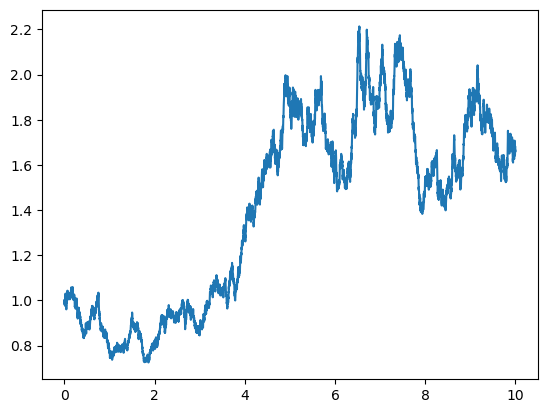

In [60]:
mu = lambda t, x: 0.01 * x#np.exp(np.exp(-t))#0.4 * np.sqrt(t) * np.cos(x) * np.exp(np.exp(t)) * 1/(1+x)**4 * np.tan(x/(1+x))
vol = lambda t, x: 0.2 * x#0.3 * np.sin(1/(x+0.01)) * np.exp(-t)
Y0 = 1
Y = Y0 * np.ones(n)
for i in range(n-1):
    Y[i+1] = Y[i] + mu(t[i], Y[i]) * h + vol(t[i], Y[i]) * (B[i+1] - B[i])

plt.plot(t, Y)
plt.show()

In [61]:
# sample random matrices
A0 = np.random.normal(0, 1, (M, M))
A1 = np.random.normal(0, 1, (M, M))
b0 = np.random.normal(0, 1, M)
b1 = np.random.normal(0, 1, M)

# activation
sigma = lambda x: 1/(1+np.exp(-x)) #(np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

# sample r-sig path
X0 = np.eye(1, M, 0).squeeze()
X = np.zeros((n, M))
X[0,:] = X0
for i in range(n-1):
    if i % 1000 == 0: print(f"{i = }")
    X[i+1,:] = X[i,:] + sigma(A0.dot(X[i,:]) + b0) * h + sigma(A1.dot(X[i,:]) + b1) * (B[i+1] - B[i])

i = 0
i = 1000
i = 2000
i = 3000
i = 4000
i = 5000
i = 6000
i = 7000
i = 8000
i = 9000


In [62]:
j = int(n/2)
Ytrain = Y[:j]
Xtrain = X[:j,:]
print(f"{Xtrain.shape = }")
print(f"{Ytrain.shape = }")

lm = linear_model.Ridge(alpha=0.05, fit_intercept=True)
model = lm.fit(Xtrain,Ytrain)
beta = model.coef_
print(f"{beta.shape = }")

Y_hat = X.dot(beta) + 1

Xtrain.shape = (5000, 500)
Ytrain.shape = (5000,)
beta.shape = (500,)


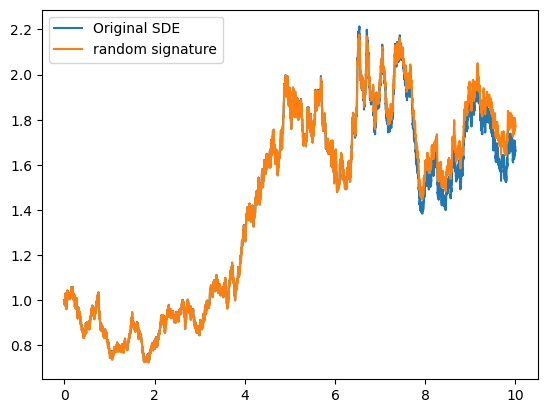

In [63]:
plt.plot(t, Y, label = 'Original SDE')
plt.plot(t, Y_hat, label = 'random signature')
plt.legend()
plt.show()